In [3]:
# 载入依赖包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 画图的主题设计
sns.set_theme()
sns.set_context('notebook')
# 加载数据
data_user = pd.read_csv('D:\\coding\\Study_code\\HUAT-kerwin-labwork\\数据分析与可视化课程设计\\user_action.csv')
data_user.head(20)

,user_id,item_id,behavior_type,item_category,time
0,98047837,232431562,1,4245,2014-12-06 02
1,97726136,383583590,1,5894,2014-12-09 20
2,98607707,64749712,1,2883,2014-12-18 11
3,98662432,320593836,1,6562,2014-12-06 10
4,98145908,290208520,1,13926,2014-12-16 21
5,93784494,337869048,1,3979,2014-12-03 20
6,94832743,105749725,1,9559,2014-12-13 20
7,95290487,76866650,1,10875,2014-11-27 16
8,96610296,161166643,1,3064,2014-12-11 23
9,100684618,21751142,3,2158,2014-12-05 23


In [5]:
# 查看数据集量级
print('整体数据的大小为',len(data_user))

print('数据集中用户数量是：',len(set(data_user['user_id'])))
print('数据集中商品数量是：',len(set(data_user['item_id'])))
print('数据集中商品类别数量是：',len(set(data_user['item_category'])))

整体数据的大小为 12256906
数据集中用户数量是： 10000
数据集中商品数量是： 2876947
数据集中商品类别数量是： 8916


In [4]:
# 查看数据缺失情况
data_user.isnull().sum()

user_id          0
item_id          0
behavior_type    0
item_category    0
time             0
dtype: int64

In [5]:
# 分割天(date)和小时(hour)
data_user['date'] = data_user['time'].map(lambda x: x.split(' ')[0])
data_user['hour'] = data_user['time'].map(lambda x: x.split(' ')[1])
data_user.head()

,user_id,item_id,behavior_type,item_category,time,date,hour
0,98047837,232431562,1,4245,2014-12-06 02,2014-12-06,02
1,97726136,383583590,1,5894,2014-12-09 20,2014-12-09,20
2,98607707,64749712,1,2883,2014-12-18 11,2014-12-18,11
3,98662432,320593836,1,6562,2014-12-06 10,2014-12-06,10
4,98145908,290208520,1,13926,2014-12-16 21,2014-12-16,21


In [6]:
# 查看字段类型：
data_user.dtypes

user_id           int64
item_id           int64
behavior_type     int64
item_category     int64
time             object
date             object
hour             object
dtype: object

In [9]:
data_user['user_id'] = data_user['user_id'].astype('object')
data_user['item_id'] = data_user['item_id'].astype('object')
data_user['item_category'] = data_user['item_category'].astype('object')
data_user['date'] = pd.to_datetime(data_user['date'])
data_user['hour'] = data_user['hour'].astype('int64')

data_user.dtypes

user_id                  object
item_id                  object
behavior_type             int64
item_category            object
time                     object
date             datetime64[ns]
hour                      int64
dtype: object

In [10]:
# 计算PV: PageView , UV: UniqueView
# PV: select count(user_id) from data_user group by "date";
# UV: select count(distinct(user_id)) from data_user group by "date";

pv_daily = data_user.groupby('date')['user_id'].count()
# pv_daily.head()
pv_daily = pv_daily.reset_index()
pv_daily = pv_daily.rename(columns={'user_id': 'PV'})
pv_daily

,date,PV
0,2014-11-18,366701
1,2014-11-19,358823
2,2014-11-20,353429
3,2014-11-21,333104
4,2014-11-22,361355
5,2014-11-23,382702
6,2014-11-24,378342
7,2014-11-25,370239
8,2014-11-26,360896
9,2014-11-27,371384


In [11]:
# 计算UV
uv_daily = data_user.groupby('date')['user_id'].apply(lambda x: len(x.unique()))
uv_daily = uv_daily.reset_index()
uv_daily = uv_daily.rename(columns = {'user_id':'uv_daily'})
uv_daily

,date,uv_daily
0,2014-11-18,6343
1,2014-11-19,6420
2,2014-11-20,6333
3,2014-11-21,6276
4,2014-11-22,6187
5,2014-11-23,6373
6,2014-11-24,6513
7,2014-11-25,6351
8,2014-11-26,6357
9,2014-11-27,6359


Text(0.5, 1.0, 'uv_daily')

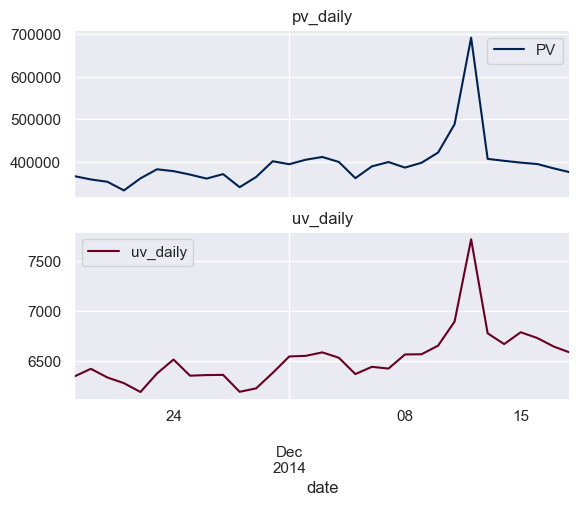

In [15]:
# 可视化
fig, axes = plt.subplots(2,1,sharex=True)
# pv_daily: pandas 对象
# Matplotlib, Pandas , histplot:  柱状图
pv_daily.plot(x='date', y='PV', ax=axes[0], colormap='cividis')
uv_daily.plot(x='date', y='uv_daily', ax=axes[1], colormap='RdGy')
axes[0].set_title('pv_daily')
axes[1].set_title('uv_daily')

In [16]:
# 计算每小时的PV
pv_hour = data_user.groupby('hour')['user_id'].count()
pv_hour = pv_hour.reset_index()
pv_hour = pv_hour.rename(columns={'user_id':'pv_hour'})
pv_hour

,hour,pv_hour
0,0,517404
1,1,267682
2,2,147090
3,3,98516
4,4,80487
5,5,88296
6,6,158798
7,7,287337
8,8,396106
9,9,485951


In [17]:
# 计算每小时UV
uv_hour = data_user.groupby('hour')['user_id'].apply(lambda x: len(x.unique()))
uv_hour = uv_hour.reset_index()
uv_hour = uv_hour.rename(columns={'user_id':'uv_hour'})
uv_hour

,hour,uv_hour
0,0,5786
1,1,3780
2,2,2532
3,3,1937
4,4,1765
5,5,2030
6,6,3564
7,7,5722
8,8,7108
9,9,7734


Text(0.5, 1.0, 'uv_hour')

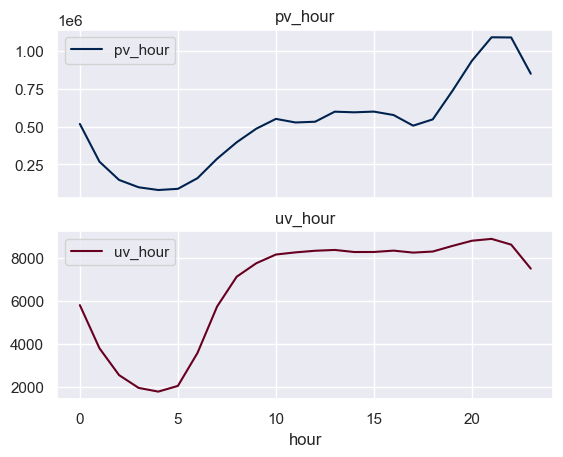

In [18]:
# 可视化
fig, axes = plt.subplots(2,1,sharex=True)
pv_hour.plot(x='hour',y='pv_hour',ax=axes[0],colormap='cividis')
uv_hour.plot(x='hour', y='uv_hour', ax=axes[1],colormap='RdGy')
axes[0].set_title('pv_hour')
axes[1].set_title('uv_hour')

In [20]:
data_user_1212 = data_user.loc[data_user['date']=='2014-12-12']
data_user_1212

,user_id,item_id,behavior_type,item_category,time,date,hour
13,101260672,212072908,1,10984,2014-12-12 11,2014-12-12,11
20,101781721,19349307,1,1863,2014-12-12 12,2014-12-12,12
54,100684618,94486594,1,10984,2014-12-12 23,2014-12-12,23
69,103802946,190848347,1,5232,2014-12-12 22,2014-12-12,22
95,104811265,354843735,1,10585,2014-12-12 21,2014-12-12,21
...,...,...,...,...,...,...,...
12256729,79359253,69183918,1,1863,2014-12-12 19,2014-12-12,19
12256874,91530370,181004546,1,12758,2014-12-12 23,2014-12-12,23
12256878,91530370,170765640,1,3381,2014-12-12 00,2014-12-12,0
12256896,91530370,94732789,1,12090,2014-12-12 23,2014-12-12,23


In [21]:
# 计算每小时的PV
pv_hour_1212 = data_user_1212.groupby('hour')['user_id'].count().reset_index().rename(columns={'user_id':'1212_pv_hour'})
uv_hour_1212 = data_user_1212.groupby('hour')['user_id'].apply(lambda x: len(x.unique())).reset_index().rename(columns={'user_id':'1212_uv_hour'})
pv_hour_1212

,hour,1212_pv_hour
0,0,50030
1,1,22761
2,2,11754
3,3,6173
4,4,5168
5,5,6417
6,6,12820
7,7,22177
8,8,28156
9,9,32695


Text(0.5, 1.0, 'pv_hour_1212')

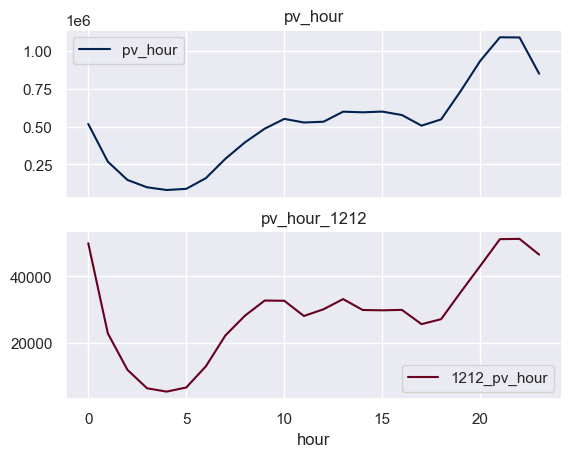

In [22]:
# 可视化PV
fig, axes = plt.subplots(2,1,sharex=True)
pv_hour.plot(x='hour',y='pv_hour',ax=axes[0],colormap='cividis')
pv_hour_1212.plot(x='hour', y='1212_pv_hour', ax=axes[1],colormap='RdGy')
axes[0].set_title('pv_hour')
axes[1].set_title('pv_hour_1212')

Text(0.5, 1.0, 'uv_hour_1212')

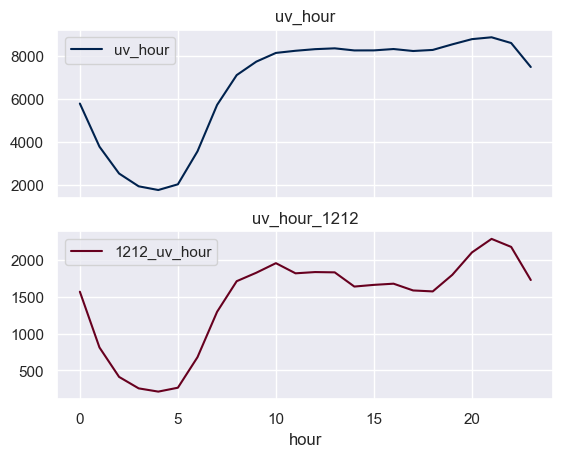

In [23]:
# 可视化 UV
fig, axes = plt.subplots(2,1,sharex=True)
uv_hour.plot(x='hour',y='uv_hour',ax=axes[0],colormap='cividis')
uv_hour_1212.plot(x='hour', y='1212_uv_hour', ax=axes[1],colormap='RdGy')
axes[0].set_title('uv_hour')
axes[1].set_title('uv_hour_1212')

In [24]:
# 基于 behavior_type & hour 分组
# 点击、收藏、加购物车、支付四种行为，分别用数字1、2、3、4表示
pv_behavior = data_user.groupby(['behavior_type','hour'])['user_id'].count()
pv_behavior = pv_behavior.reset_index()
pv_behavior = pv_behavior.rename(columns={'user_id':'pv_behavior'})
pv_behavior

,behavior_type,hour,pv_behavior
0,1,0,487341
1,1,1,252991
2,1,2,139139
3,1,3,93250
4,1,4,75832
...,...,...,...
91,4,19,6352
92,4,20,7872
93,4,21,8829
94,4,22,8845


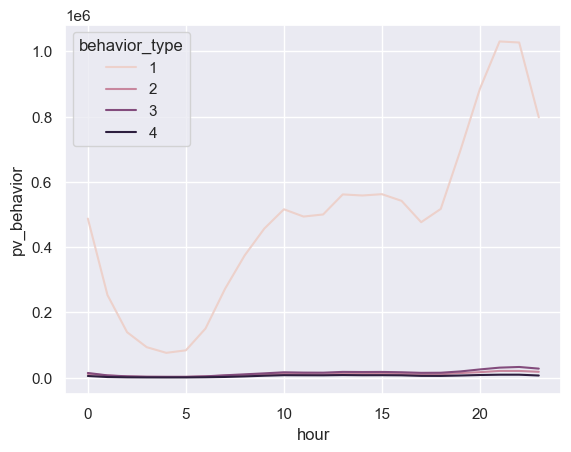

In [25]:
# 可视化
# sns: serborn
ax = sns.lineplot(x='hour',y='pv_behavior',hue='behavior_type',data=pv_behavior)

<Axes: xlabel='hour', ylabel='pv_behavior'>

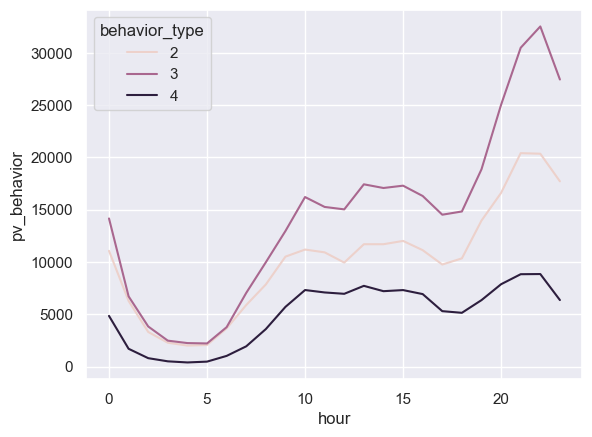

In [26]:
sns.lineplot(x='hour',y='pv_behavior',hue='behavior_type',data=pv_behavior[pv_behavior.behavior_type!=1])

In [27]:
behavior_type = data_user.groupby(['behavior_type'])['user_id'].count()

behavior_type

behavior_type
1    11550581
2      242556
3      343564
4      120205
Name: user_id, dtype: int64

In [28]:
click_num, fav_num, add_num, pay_num =  behavior_type[1], behavior_type[2], behavior_type[3], behavior_type[4]

fav_add_num = fav_num + add_num 
print('加购/收藏转化率：', 100 * fav_add_num / click_num)
print('点击 到 购买转化率: ', 100 * pay_num / click_num)
print('加购/收藏 到 购买转化率: ', 100 * pay_num / fav_add_num)

加购/收藏转化率： 5.074376778103197
点击 到 购买转化率:  1.0406835811982098
加购/收藏 到 购买转化率:  20.508598921722513


In [29]:
data_user_1212 = data_user.loc[data_user['date']=='2014-12-12']
behavior_type = data_user_1212.groupby(['behavior_type'])['user_id'].count()

click_num, fav_num, add_num, pay_num =  behavior_type[1], behavior_type[2], behavior_type[3], behavior_type[4]

fav_add_num = fav_num + add_num 
print('双十二 加购/收藏转化率：', 100 * fav_add_num / click_num)
print('双十二 点击 到 购买转化率: ', 100 * pay_num / click_num)
print('双十二 加购/收藏 到 购买转化率: ', 100 * pay_num / fav_add_num)

双十二 加购/收藏转化率： 5.448732437837779
双十二 点击 到 购买转化率:  2.3773707847303305
双十二 加购/收藏 到 购买转化率:  43.631630142472964


In [30]:
## 浏览 >> 加购/收藏 >> 购买（4）
data_user_buy = data_user[data_user.behavior_type==4].groupby('user_id')['behavior_type'].count()
data_user_buy

user_id
4913          6
6118          1
7528          6
7591         21
12645         8
             ..
142376113     1
142412247    12
142430177     5
142450275    40
142455899    13
Name: behavior_type, Length: 8886, dtype: int64

<Axes: xlabel='user_id'>

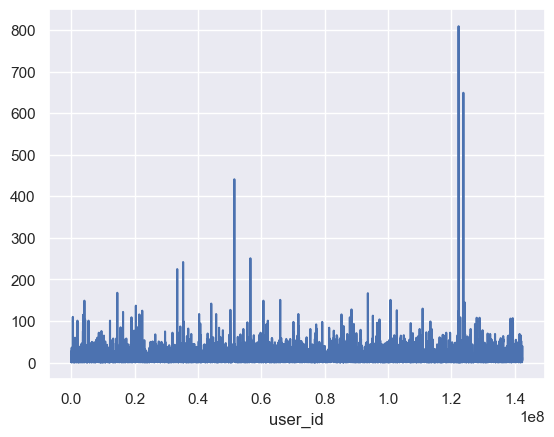

In [31]:
data_user_buy.plot(x='user_id',y='buy_count')

In [32]:
#给数据集中每一个用户赋值一个1，表示有登录操作
data_user['action'] = 1 

# 得到 date, user_id, behavior_type和计算用户每日的登录次数
data_user_arpu = data_user.groupby(['date','user_id','behavior_type'])['action'].count()
data_user_arpu = data_user_arpu.reset_index()

data_user_arpu.head(20)

,date,user_id,behavior_type,action
0,2014-11-18,4913,1,27
1,2014-11-18,4913,2,1
2,2014-11-18,7591,1,4
3,2014-11-18,12645,1,25
4,2014-11-18,54056,1,13
5,2014-11-18,54056,2,1
6,2014-11-18,54056,4,1
7,2014-11-18,79824,1,40
8,2014-11-18,79824,4,2
9,2014-11-18,88930,1,75


In [37]:
# 计算arpu，近似公式： ARPU = 每日消费次数 / 每日活跃用户数
arpu = (
    data_user_arpu[['date', 'behavior_type', 'action', 'user_id']]
    .groupby('date')
    .apply(lambda x: x[x['behavior_type'] == 4]['action'].sum() / len(x['user_id'].unique()))
)
arpu

C:\Users\21711\AppData\Local\Temp\ipykernel_14072\1213192974.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x[x['behavior_type'] == 4]['action'].sum() / len(x['user_id'].unique()))


date
2014-11-18    0.588050
2014-11-19    0.574143
2014-11-20    0.546660
2014-11-21    0.481358
2014-11-22    0.577016
2014-11-23    0.525184
2014-11-24    0.526025
2014-11-25    0.545426
2014-11-26    0.562058
2014-11-27    0.577135
2014-11-28    0.519955
2014-11-29    0.515906
2014-11-30    0.566860
2014-12-01    0.597341
2014-12-02    0.552824
2014-12-03    0.589977
2014-12-04    0.565151
2014-12-05    0.521282
2014-12-06    0.508075
2014-12-07    0.507007
2014-12-08    0.520871
2014-12-09    0.525282
2014-12-10    0.483464
2014-12-11    0.467943
2014-12-12    1.975518
2014-12-13    0.513282
2014-12-14    0.522346
2014-12-15    0.554590
2014-12-16    0.560410
2014-12-17    0.544182
2014-12-18    0.544819
dtype: float64

Text(0.5, 1.0, 'ARPU')

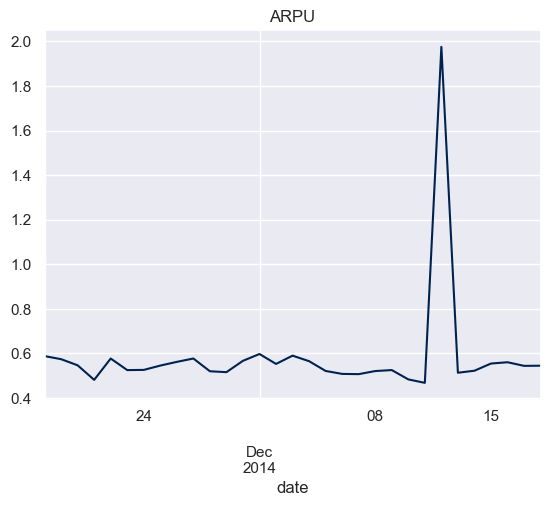

In [38]:
# 可视化
arpu.plot(colormap='cividis')
plt.title('ARPU')

In [39]:
# 计算每日的所有用户的购买次数
data_user_arppu = data_user[data_user['behavior_type']==4].groupby(['date','user_id'])['behavior_type'].count()
data_user_arppu = data_user_arppu.reset_index().rename(columns={'behavior_type':'buy_count'})
data_user_arppu.head()

,date,user_id,buy_count
0,2014-11-18,54056,1
1,2014-11-18,79824,2
2,2014-11-18,88930,2
3,2014-11-18,247543,5
4,2014-11-18,475826,3


In [40]:
# 计算ARPPU
data_user_arppu = data_user_arppu.groupby('date').apply(lambda x:x['buy_count'].sum() / x['user_id'].count())

data_user_arppu

C:\Users\21711\AppData\Local\Temp\ipykernel_14072\1200827063.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_user_arppu = data_user_arppu.groupby('date').apply(lambda x:x['buy_count'].sum() / x['user_id'].count())


date
2014-11-18    2.423652
2014-11-19    2.439444
2014-11-20    2.320375
2014-11-21    2.271429
2014-11-22    2.530120
2014-11-23    2.330780
2014-11-24    2.248031
2014-11-25    2.313961
2014-11-26    2.402824
2014-11-27    2.403405
2014-11-28    2.231623
2014-11-29    2.331881
2014-11-30    2.357236
2014-12-01    2.359083
2014-12-02    2.284543
2014-12-03    2.289334
2014-12-04    2.328707
2014-12-05    2.223041
2014-12-06    2.253444
2014-12-07    2.320741
2014-12-08    2.204384
2014-12-09    2.413576
2014-12-10    2.230236
2014-12-11    2.226363
2014-12-12    3.913523
2014-12-13    2.245320
2014-12-14    2.312749
2014-12-15    2.313460
2014-12-16    2.285455
2014-12-17    2.302548
2014-12-18    2.310567
dtype: float64

Text(0.5, 1.0, 'ARPPU')

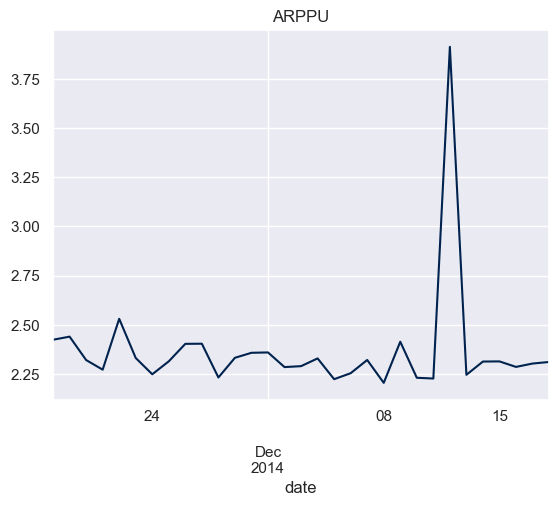

In [41]:
data_user_arppu.plot(colormap='cividis')
plt.title('ARPPU')

In [42]:
# 计算用户购买频次
data_user_pay = data_user[data_user.behavior_type==4]
# 基于date去重，得到的结果即为购物分布的天数：
data_user_pay = data_user_pay.groupby('user_id')['date'].apply(lambda x: len(x.unique()))

data_user_pay

user_id
4913         5
6118         1
7528         6
7591         9
12645        4
            ..
142376113    1
142412247    7
142430177    5
142450275    8
142455899    7
Name: date, Length: 8886, dtype: int64

In [43]:
# 计算复购率：
repeat_buy_ratio = data_user_pay[data_user_pay > 1].count() / data_user_pay.count()
repeat_buy_ratio

np.float64(0.8717083051991897)

In [44]:
data_user['action'] = 1 # 对每一行的行为记为1次，通过对行为次数的相加，从而计算频次
data_user_buy = data_user[data_user.behavior_type == 4]
data_user_buy = data_user_buy.groupby(['user_id','date'])['action'].count()
data_user_buy = data_user_buy.reset_index()
data_user_buy.head(30)

,user_id,date,action
0,4913,2014-12-01,1
1,4913,2014-12-07,2
2,4913,2014-12-11,1
3,4913,2014-12-13,1
4,4913,2014-12-16,1
5,6118,2014-12-17,1
6,7528,2014-11-22,1
7,7528,2014-11-26,1
8,7528,2014-11-27,1
9,7528,2014-11-30,1


In [45]:
# 思考： 读者可以测试下不加 dropna 是什么结果。
# data_user_buyagain = data_user_buy.groupby('user_id').date.apply(lambda x:x.sort_values().diff(1))

# 对日期排序（按照先后顺序），给予pandas的date函数计算前后两次购物相差的天数，dropna去掉了每个用户在数据集周期内第一次购买日期的记录：
data_user_buy_date_diff = data_user_buy.groupby('user_id').date.apply(lambda x:x.sort_values().diff(1).dropna())

data_user_buy_date_diff.head(30)

user_id    
4913     1     6 days
         2     4 days
         3     2 days
         4     3 days
7528     7     4 days
         8     1 days
         9     3 days
         10    3 days
         11   10 days
7591     13    7 days
         14    1 days
         15    1 days
         16    2 days
         17    4 days
         18    1 days
         19    1 days
         20    1 days
12645    22    2 days
         23    4 days
         24   11 days
54056    26   19 days
79824    29    9 days
         30    8 days
         31    6 days
         32    1 days
         33    1 days
         34    3 days
88930    36    2 days
         37    2 days
         38    1 days
Name: date, dtype: timedelta64[ns]

Text(0, 0.5, 'count')

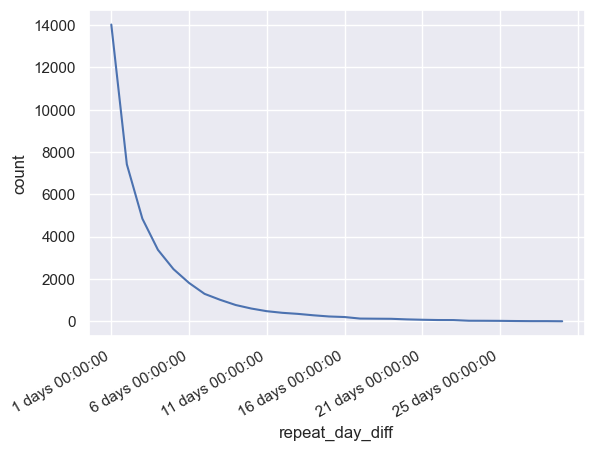

In [46]:
data_user_buy_date_diff.value_counts().plot(kind='line')

plt.xlabel('repeat_day_diff')
plt.ylabel('count')

Text(0, 0.5, 'count')

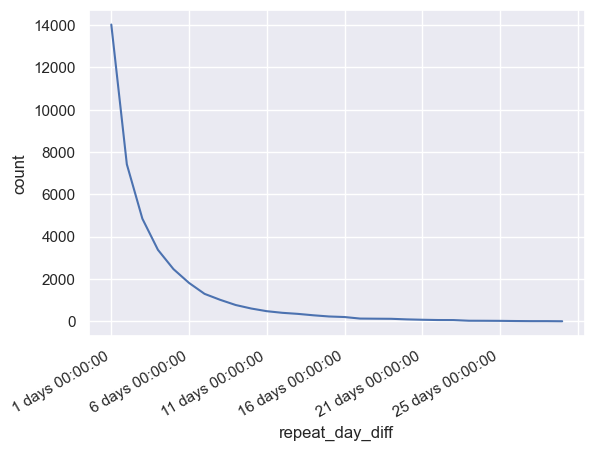

In [47]:
data_user_buy_date_diff.value_counts().plot(kind='line')

plt.xlabel('repeat_day_diff')
plt.ylabel('count')